In [1]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import string

In [2]:
# Descargar stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
stop_words = set(stopwords.words('english'))

In [6]:
df = pd.read_csv('scopus.csv')
df.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Page count,Link,Abstract,Author Keywords,Index Keywords,Publisher,Language of Original Document,Document Type,Publication Stage,Source
0,Li S.; Zhang Q.; Huang Z.; Chen F.,"Li, Shifu (57344445800); Zhang, Qian (57804549...",57344445800; 57804549400; 55494598200; 5720980...,Integrative analysis of multi-omics data to id...,2023,Inflammation Research,72.0,5,NaN,1001,...,18.0,https://www.scopus.com/inward/record.uri?eid=2...,Objective and design: The prevalence of intrac...,Bioinformatics; Immunity; Intracranial aneurys...,"Aneurysm, Ruptured; Animals; Biomarkers; Intra...",Springer Science and Business Media Deutschlan...,English,Article,Final,Scopus
1,Seyed C.; Kebe M.; Arby M.E.M.E.; Mahmoud E.B....,"Seyed, Cheikhane (57190401501); Kebe, Mbaye (5...",57190401501; 57202789418; 58852554500; 5721411...,Cybersecurity Mechanism for Automatic Detectio...,2024,Journal of Computer Science,20.0,1,NaN,44,...,7.0,https://www.scopus.com/inward/record.uri?eid=2...,This article proposes an ML-based cyber securi...,Cyber Security; IA; IoT; Machine Learning; Per...,NaN,Science Publications,English,Article,Final,Scopus
2,Kamble K.S.; Sengupta J.,"Kamble, Kranti S. (57386764600); Sengupta, Joy...",57386764600; 55596935200,EVNCERS: An Integrated Eigenvector Centrality-...,2023,IEEE Sensors Journal,23.0,18,NaN,21661,...,8.0,https://www.scopus.com/inward/record.uri?eid=2...,"Affective computing, which focuses on identify...",Affective emotion recognition; channel selecti...,Biomedical signal processing; Eigenvalues and ...,Institute of Electrical and Electronics Engine...,English,Article,Final,Scopus
3,Du W.; Qiu T.; Liu H.; Liu A.; Wu Z.; Sun X.; ...,"Du, Wenxing (57206730654); Qiu, Tong (55628626...",57206730654; 55628626400; 58964385000; 5720672...,The predictive value of serum tumor markers fo...,2024,Heliyon,10.0,9,e29605,NaN,...,NaN,https://www.scopus.com/inward/record.uri?eid=2...,Objective: The predictive value of serum tumor...,Epidermal growth factor receptor; Lung cancer;...,NaN,Elsevier Ltd,English,Article,Final,Scopus
4,Maimaiti A.; Turhon M.; Abulaiti A.; Dilixiati...,"Maimaiti, Aierpati (57221521469); Turhon, Mirz...",57221521469; 57558415200; 57970338800; 5824756...,DNA methylation regulator-mediated modificatio...,2023,Journal of Translational Medicine,21.0,1,660,NaN,...,NaN,https://www.scopus.com/inward/record.uri?eid=2...,Background: Intracranial aneurysms (IAs) pose ...,DNA methylation regulator; Genome-wide associa...,DNA Methylation; Epigenome; Genome-Wide Associ...,BioMed Central Ltd,English,Article,Final,Scopus


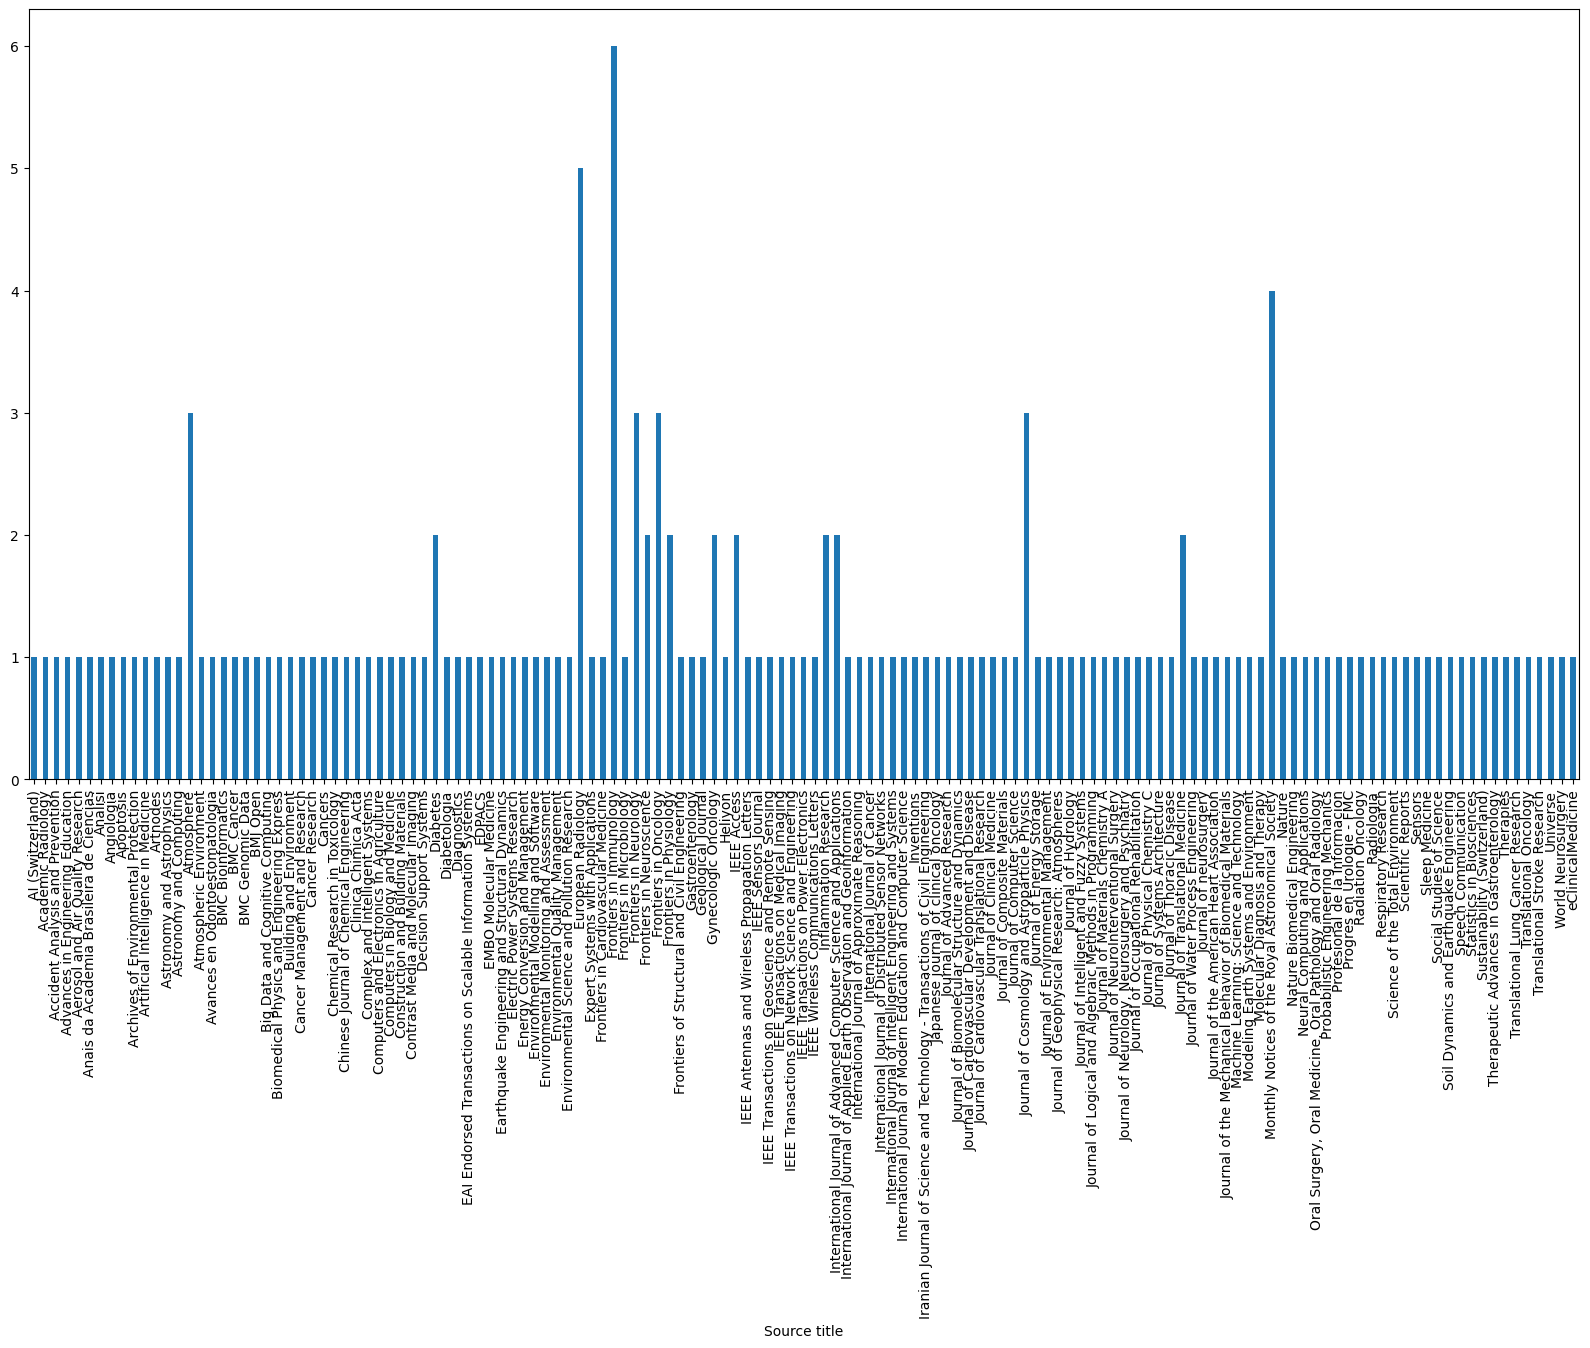

In [25]:
grouped = df.groupby('Source title')['Title'].count()
plt.figure(figsize=(20, 10))
grouped.plot(kind='bar')
plt.show()

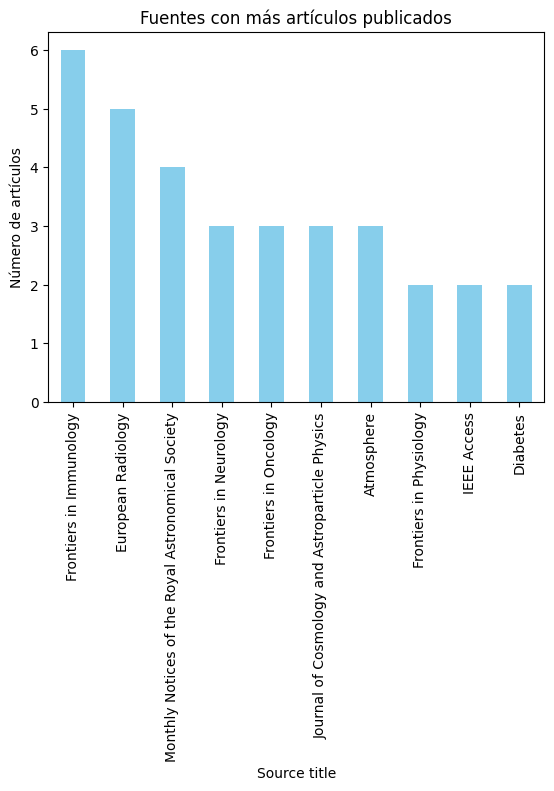

In [8]:
grouped = df.groupby('Source title')['Title'].count().sort_values(ascending=False)
top_sources = grouped.head(10)
top_sources.plot(kind='bar', color='skyblue')
plt.title('Fuentes con más artículos publicados')
plt.xlabel('Source title')
plt.ylabel('Número de artículos')
plt.show()

In [9]:
# Función para limpiar y preparar texto
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word not in stop_words])

# Analizar Titulos

In [17]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Contar palabras en todos los títulos
word_counts = Counter()
df['clean_title'].str.split().apply(word_counts.update)

# Crear un DataFrame a partir del contador de palabras
word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Ordenar las palabras por frecuencia de aparición, de mayor a menor
word_df = word_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Añadir columna de rank
word_df['Rank'] = word_df['Frequency'].rank(method='dense', ascending=False)

# Mostrar el DataFrame de palabras ordenadas por rango
word_df.head(20)

,Word,Frequency,Rank
0,learning,57,1.0
1,machine,57,1.0
2,prediction,31,2.0
3,using,28,3.0
4,intracranial,26,4.0
5,based,24,5.0
6,ia,16,6.0
7,model,16,6.0
8,analysis,15,7.0
9,study,15,7.0


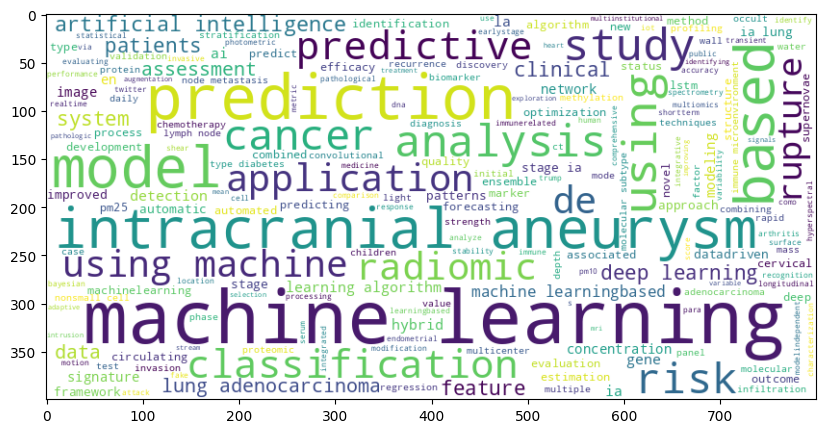

In [18]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

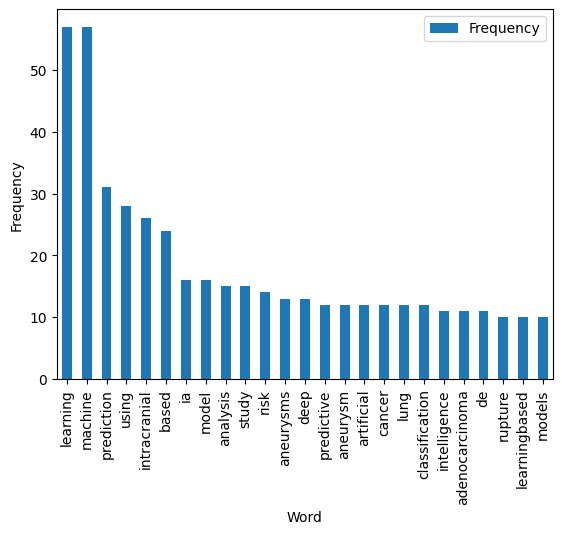

In [19]:
import matplotlib.pyplot as plt
word_df.sort_values(by='Frequency', ascending=False).head(25).plot(x='Word', y='Frequency', kind='bar')
plt.xlabel('Word')
_ = plt.ylabel('Frequency')

<ipython-input-28-63b504922288>:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama


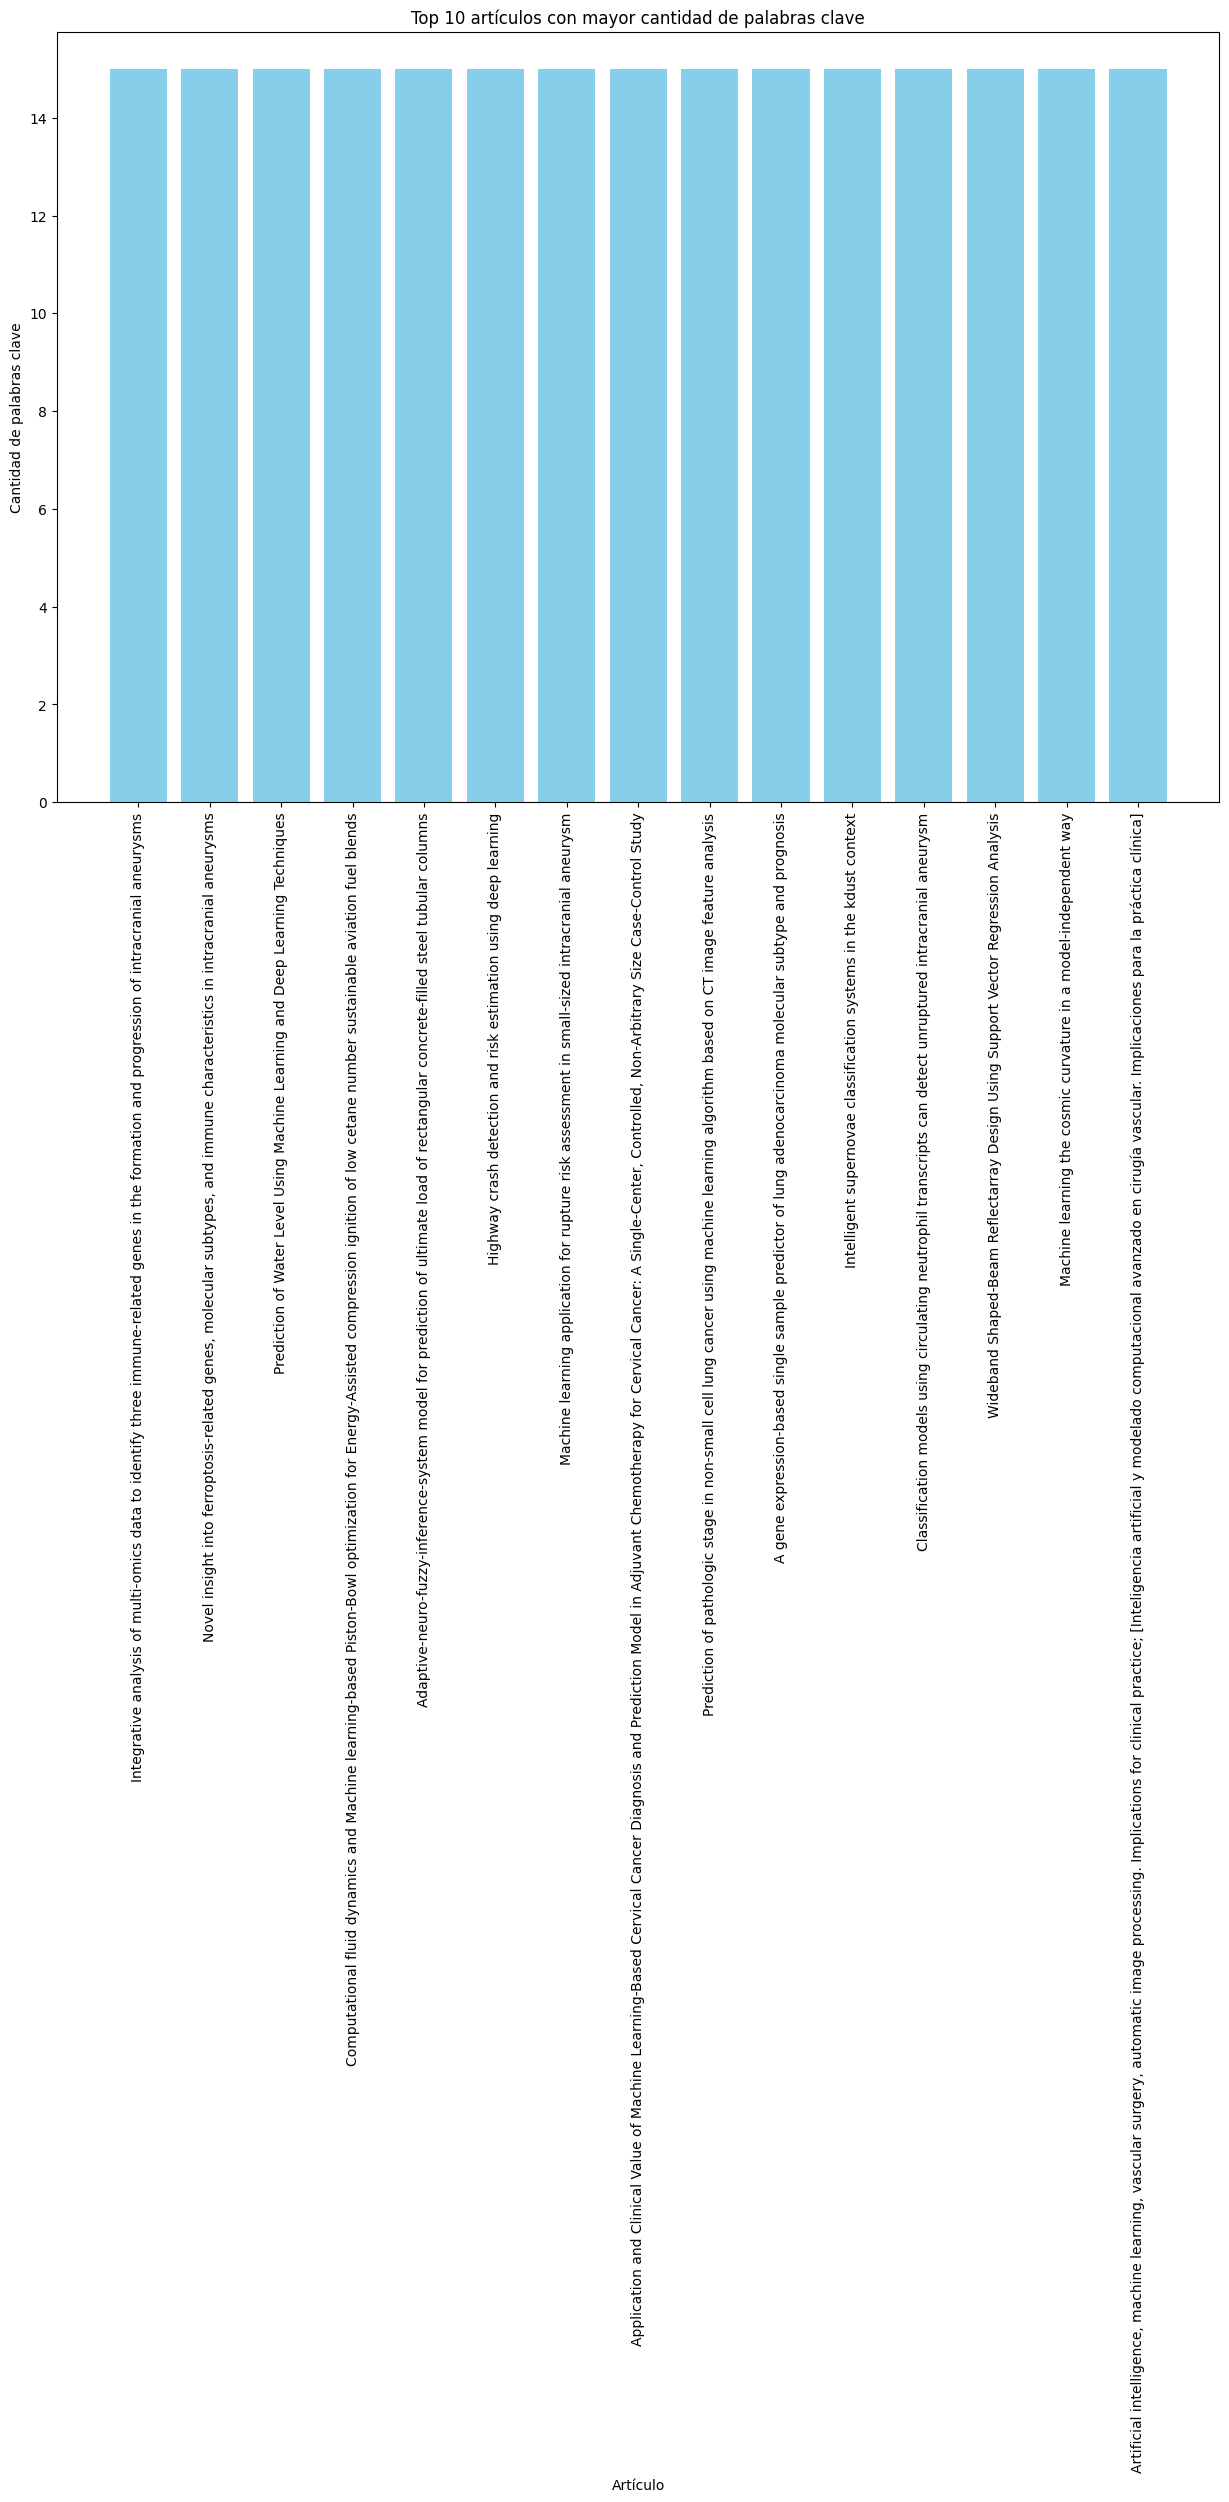

In [28]:
# Contar palabras en todos los títulos
word_counts = Counter()
df['Title'].apply(lambda title: word_counts.update(clean_text(title)))

# Determinar un número de palabras clave a considerar (e.g., top 10)
num_keywords = 15
keywords = [word for word, count in word_counts.most_common(num_keywords)]

# Función para contar cuántas palabras clave contiene cada título
def count_keywords(title):
    words = clean_text(title)
    return sum(word in words for word in keywords)

# Contar las palabras clave por título
df['keyword_count'] = df['Title'].apply(count_keywords)

# Ordenar el DataFrame por 'keyword_count' de forma descendente
df_sorted = df.sort_values(by='keyword_count', ascending=False)

# Graficar los top 10 artículos con más palabras clave
plt.figure(figsize=(15, 10))
plt.bar(df_sorted['Title'].head(15), df_sorted['keyword_count'].head(15), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Artículo')
plt.ylabel('Cantidad de palabras clave')
plt.title('Top 10 artículos con mayor cantidad de palabras clave')
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

# ANALIZAR ABSTRACT

In [23]:


# Seleccionar los abstracts de los artículos con más palabras clave
top_abstracts = df.sort_values(by='keyword_count', ascending=False).head(10)['Abstract']

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:3]  # Tomar las 3 oraciones con mayor puntuación
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado
top_abstracts_summary = top_abstracts.apply(summarize_abstract)

# Mostrar resúmenes
for i, summary in enumerate(top_abstracts_summary, 1):
    print(f"Resumen {i}:\n{summary}\n")


Resumen 1:
© 2023, The Author(s), under exclusive licence to Springer Nature Switzerland AG. Methods and results: We conducted a comprehensive analysis combined with multi-omics data and methods to identify immune-related genes (IRGs) and immunocytes involved in IAs. Of 21 IRGs identified by overlapping, a three-gene (CXCR4, S100B, and OSM) model was constructed through LASSO logistic regression.

Resumen 2:
© 2022, The Author(s), under exclusive licence to Springer Nature Switzerland AG. We divided the IA samples into two clusters and found that cluster 2 had a higher proportion of rupture and immune infiltration. The differentially expressed ferroptosis-related genes (DEFRGs) were selected to construct a diagnostic model integrating with machine learning.

Resumen 3:
© 2023, The Author(s), under exclusive licence to Shiraz University. Forecasting the water levels in rivers and lakes is critical for flood warnings and water-resource management. Many soft computing techniques have been

In [24]:
# Contar la aparición de palabras clave en cada título
df['keyword_count'] = df['Title'].apply(lambda x: sum(word in clean_text(x) for word in word_df))

# Seleccionar los abstracts de los artículos con más palabras clave
top_articles = df.sort_values(by='keyword_count', ascending=False).head(10)

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:2]
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado y almacenar junto con el título
top_articles['Summary'] = top_articles['Abstract'].apply(summarize_abstract)

# Mostrar títulos y resúmenes
for index, row in top_articles.iterrows():
    print(f"Title: {row['Title']}\nSummary: {row['Summary']}\n")


Title: Integrative analysis of multi-omics data to identify three immune-related genes in the formation and progression of intracranial aneurysms
Summary: © 2023, The Author(s), under exclusive licence to Springer Nature Switzerland AG. Methods and results: We conducted a comprehensive analysis combined with multi-omics data and methods to identify immune-related genes (IRGs) and immunocytes involved in IAs.

Title: Log-file analysis to identify internet-addiction in children
Summary: To evaluate a kids IA helps to identify their psychological conditions, and it creates a better situation for parents, teachers, and other related people to communicate with children and teenagers better way. Some of the Internet users include children and teenagers and they are active in a virtual environment.

Title: A gene expression-based single sample predictor of lung adenocarcinoma molecular subtype and prognosis
Summary: SSP2 was transformed into a NanoString nCounter assay and tested in 44 Stage 